# Target 2019 Python Lesson - Part 3
###### By: Thomas Hein, Marco Mambelli
---

This tutorial will explain what a class is and how to use it. Classes are commonly refereed to as an advanced topic. It may seem a little confusing at first but it's not complicated. Read each section step by step, that's kind of important if you're new to them.


# 1: Object Oriented Programming

### 1.1: What is Class?

> A prototype for an object that defines a set of attributes that characterize any object of the class. The attributes are data members (class variables and instance variables) and methods (functions operating on the object), accessed via dot notation.

Ah, I'm sure you now know what a class is now, Part 3.1 done...

Put aside the definition above, read this:

1. A class contains functions (called methods) and variables (called data attributes) as one big bundle.
1. You can have some methods that can be invoked outside of the class definition (public) and some that you can access only internally within the code of the class (private).
1. Same with data attributes, some can be used outside the class (public variables) and some only within the class (private variables).
1. The class is like a mold to create many variables (called objects), via instantiation `myvar = MyClassName()`. All objects have the same attributes and methods defined in the class, referred using dot notation (`myvar.attribute_name`, `myvar.method_name()`).   
1. When defining methods (aka. functions), add the variable `self` as the first parameter e.g. `def addNumbers(self, num1, num2):`. This will be the object itself.
1. When calling methods, e.g. `my_object.addNumbers(1,2)` Python will add the `self` parameter automatically using the object.
1. Within each method of the class, you can refer the class's variables by using `self.variable_name_goes_here` and methods by using `self.function_name_goes_here()`.

The last three lines refer to regular methods, aka instance methods. There are also special methods, static or class methods that behave differently. If you want to learn more about static and class methods, you can read [here](https://realpython.com/instance-class-and-static-methods-demystified/) or [this reference documentation](https://python-reference.readthedocs.io/en/latest/docs/functions/staticmethod.html), but first complete this section.

In [1]:
class MyClassName:
    pass # Pass means "Skip this line Python"

# To get an object of the class, use this
my_object = MyClassName()

Very eventful (if you see nothing appear when you run it, that's a good thing)

So, you create objects from classes. Think of classes as big templates. The template includes stuff like variables and functions. You create an object off of the class to start using its methods and variables.

In [2]:
class MyClass:
    def say_hi(self): # Remember, use self as the first argument
        print("Hi")

# Create our object first
an_object_of_the_class = MyClass()

# And call the function
an_object_of_the_class.say_hi()  # Yep, it does print "Hi"

Hi


Let's try and give the function `sayHi` in the class some arguments,

In [3]:
class MyClass:
    def say_what_i_want(self, printingtext): # Remember, use self as the first argument
        print(printingtext)

# Create our object first
an_object_of_the_class = MyClass()

# And call the function
an_object_of_the_class.say_what_i_want("This is what will end up in the printingtext variable")
# See how the first argument went after self in the function?

This is what will end up in the printingtext variable


Let's say we wanted to do something whenever an object is created. We can use a a special method called constructor, `__init__` (two underscores on each side) as this function name and then in our code block, do whatever we want whenever an object is created. Let's try by adding a variable by default to the class.

In [4]:
class YetAnotherClass:
    def __init__(self):
        self.my_variable_name = "Hey"
        print("I'm run right when an object is created from YetAnotherClass")

my_object = YetAnotherClass()

input('Click Enter')  # This is used to pause the script

print(my_object.my_variable_name)

I'm run right when an object is created from YetAnotherClass
Click Enter
Hey


And like for functions, we can pass arguments to the object constructor and add them in the `__init__` function in the class:

In [5]:
class DoSomething:
    def __init__(self, variabletext):
        self.var = variabletext

    def no_limit_on_number_of_functions(self):
        self.number_of_functions = "Infinite"

# Create an object including the variabletext
my_object = DoSomething('This is the text for var')

# print out the variable
print(my_object.var)

# Print out a variable from another function
# Call the function to create the variable
my_object.no_limit_on_number_of_functions()

# Now, print out the newly created variable
print(my_object.number_of_functions)

This is the text for var
Infinite


You can create an unlimited amount of objects too (use the template multiple times if you will)

In [6]:
class DoSomething:
    def __init__(self, variabletext):
        self.var = variabletext

object1 = DoSomething('This is object number 1')
object2 = DoSomething('This is object number 2')

print(object1.var)
print(object2.var)

This is object number 1
This is object number 2


And we see that those objects are seperate from each other because the variables within them are different.

Now, you can create variables within functions, but you can't really access them from the outside (from the object itself).

In [7]:
class counter_class:
    def __init__(self, initial_value=0): # Optional argument with default at 0
        self.counter_var = initial_value
    def increment(self, increment_value):
        self.counter_var += increment_value
        print('The counter has been incremented to ', self.counter_var)
        return self.counter_var

counter1 = counter_class() # Starting from the default value 0
counter2 = counter_class(3) # Starting from 3

counter1.increment(1)
counter1.increment(3)

print('Counter 1 is at: ', counter1.counter_var)

counter2.counter_var = 10 # Can set counter var at specific values

counter2.increment(1)
counter2.increment(3)

print('Counter 2 is at: ', counter2.counter_var)

The counter has been incremented to  1
The counter has been incremented to  4
Counter 1 is at:  4
The counter has been incremented to  11
The counter has been incremented to  14
Counter 2 is at:  14


# 2: Downloading files
## 2.1: http module

This module is part of the Standard Library. This module allows you to download files from the web. First, we need to import it.

In [8]:
import http.client

Good good. Now, with websites, it's worth noting it works.

1. Web broswer/http.client connects to the web server, so we have to create a connection
1. Once we create a connection, we need to **GET** web page
1. Once we get whatever we got, we need to check it. The response will contain a response code and possibly some content.

   What's a response code? It's a number that represents the web server's response. We want 200 - that means we got what we want. If we, say, got a 404, that means the document requested has not been found on the web server. [There are a lot of codes made by the internet people](https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html), if you have absouly nothing else to do and are really bored - you can look at them.<br><br>
   
1. If we did get 200 as our response code, we have our data!

Here's what that looks like in Python,

In [9]:
our_connection = http.client.HTTPSConnection('target2018.onlineth.com')
# We have our connectio to the host of target2018.onlineth.com

our_connection.request("GET", "/") # Let's get the homepage which is / (target2018.onlineth.com/)

# Okay, well, did we get the data?
our_response = our_connection.getresponse()

print(our_response.status)

if (our_response.status != 200):
    print(':/'+our_response.reason)
    exit()
else:
    print('We are '+our_response.reason)

200
We are OK


We got it! (Assuming it says 200 up there). Now, let's `read()` our data.

In [10]:
our_data = our_response.read()
print(our_data)

b'<!DOCTYPE html>\n<html lang="en-US" class="no-js">\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width">\n\t<link rel="profile" href="http://gmpg.org/xfn/11">\n\t<link rel="pingback" href="https://target2018.onlineth.com/xmlrpc.php">\n\t<!--[if lt IE 9]>\n\t<script src="https://target2018.onlineth.com/wp-content/themes/twentyfifteen/js/html5.js"></script>\n\t<![endif]-->\n\t<script>(function(html){html.className = html.className.replace(/\\bno-js\\b/,\'js\')})(document.documentElement);</script>\n<title>Target Python Course &#8211; Fermilab 2018</title>\n<meta name=\'robots\' content=\'noindex,follow\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel=\'dns-prefetch\' href=\'//s.w.org\' />\n<link href=\'https://fonts.gstatic.com\' crossorigin rel=\'preconnect\' />\n<link rel="alternate" type="application/rss+xml" title="Target Python Course &raquo; Feed" href="https://target2018.onlineth.com/feed/" />\n\t\t<script type="te

That's it (in html). But why does it have a `b'` at the beginning? That's not part of the html. It's because the data we got sent is in bytes. Web protocols transfer text files like html in bytes, using 8-bit for each character. Python v3 (that's what we're using) uses UTF-8. Let's get our data in a way that Python can more easily understand it.

From the Python documentation,

> Bytes literals are always prefixed with 'b' or 'B'; they produce an instance of the bytes type instead of the str type. They may only contain ASCII characters; bytes with a numeric value of 128 or greater must be expressed with escapes.

In [11]:
our_data = our_data.decode("utf-8")

Okay, now let's process parts of it. See above that some parts say `<a href=...`? That's a link. Let's use another python library to parse the html and count the number of links. Let's create a new class based off of the HTMLParser class.

Create a new class based off of the HTMLParser class? Is that even possible? Yes! It's called class inheritence. Right now there is an HTMLParser class. It can parse HTML, and that's about it. We need it to perform some actions while its parsing the HTML, which it currently is **not** set to do. For example, when it see's the start of an `a` tag, we need to see if its an `a` tag and count how many times that happens. What we can do is create a new class and import another class while creating the new class. What will happen is, that class will have everything the other class has, and we can add onto that class or redefine some variables/methods it has.

So, let's create a new class called `MyHTMLParser` and in the paramters of the class, pass the inherited class `HTMLParser`. Next, we can take a method of the `HTMLParser` class called `handle_starttag()` and redefine it here. When the class looks for a `handle_starttag()` method, it'll now use the method we defined instead of using it's old method it had.

In [12]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    HTMLParser.a_links = 0
    def handle_starttag(self, tag, attrs):
        if (tag == 'a'):
            HTMLParser.a_links += 1

parser = MyHTMLParser() # Create our object
parser.feed(our_data) # Send that to our object - feed() is a method that is included from the HTMLParser.
# When the MyHTMLParser class doesn't find it within it's class, it'll go up to the HTMLParser class and find it

print('There are '+str(parser.a_links)+' links.')

There are 14 links.


# 3: Matplotlib (3D)

## 3.1: Plot 3D Points

Some types of plots require three dimensions. Luckily instead of learning yet another module, we can stick to good old Matplotlib, which has extensions to add 3D support. Below we're going to go over a few simple examples of how one would go about plotting in 3D.

First, we need to import Matplotlib. We also have to import a library that will provide 3D support for Matplotlib. Then, we'll create a figure and add a plot that is a 3D image (`projection='3d'`). Don't worry too much about that, just know to start a basic 3D figure, use those two lines to get started.

<IPython.core.display.Javascript object>


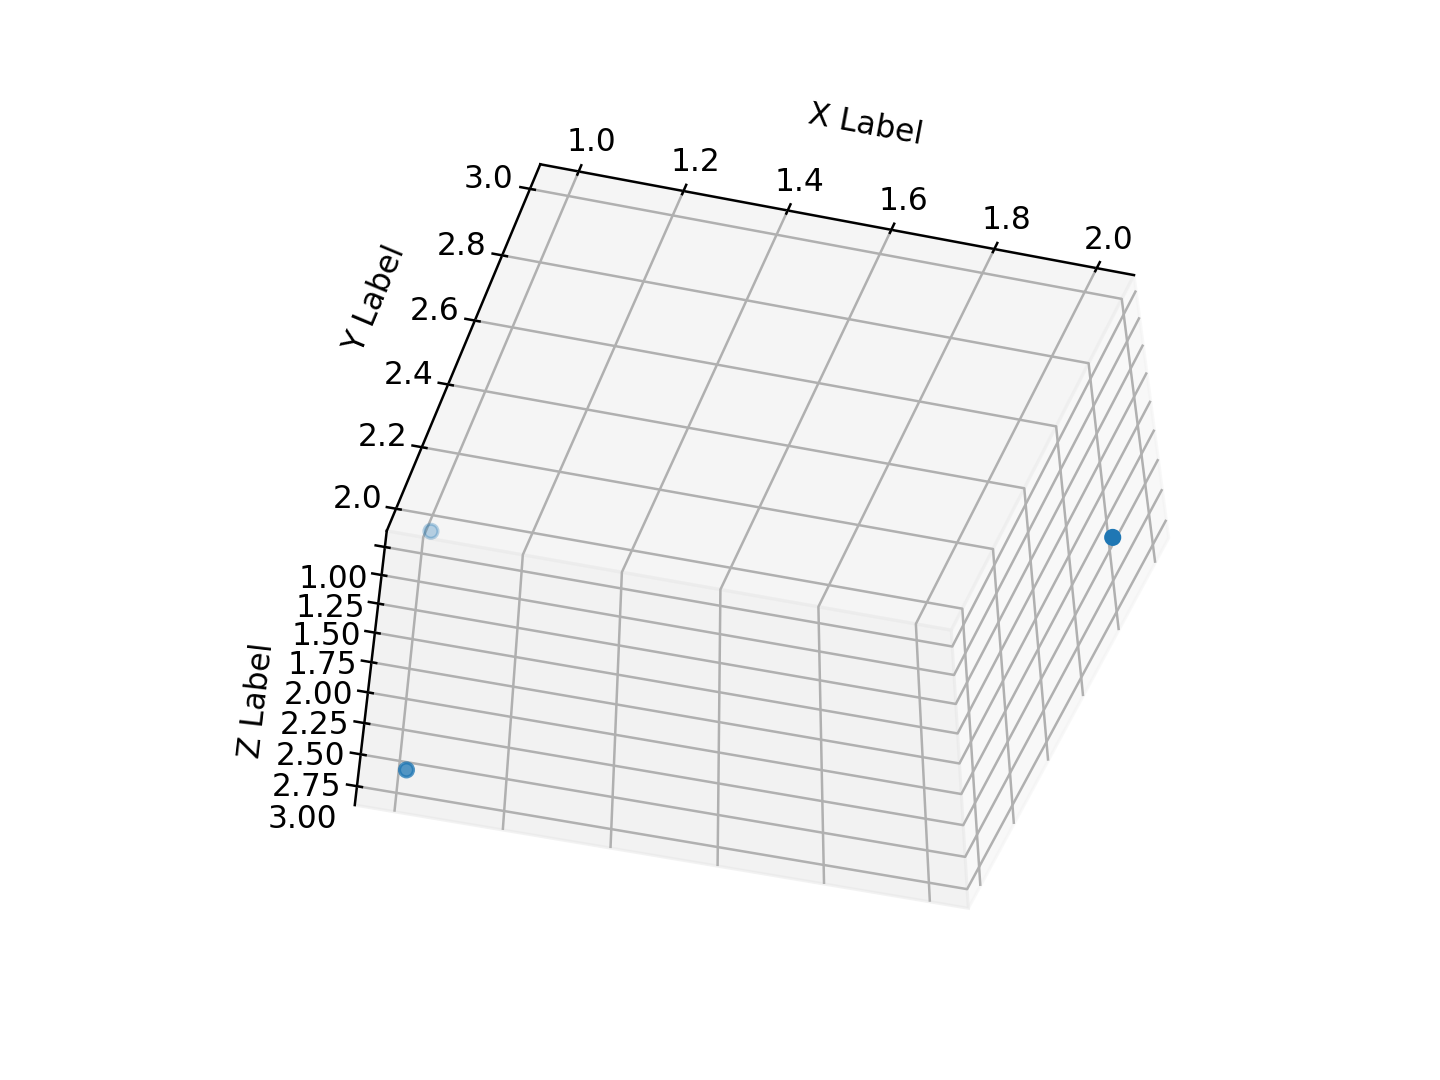

In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Now, let's add some basic data, just points for now,

In [14]:
ax.scatter([1,2,1],[2,3,2],[3,3,1])

And, just for reference, we'll add some labels on each axes,

In [15]:
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Text(0.5,0,'Z Label')

There we go, you can change up the points but make sure you rerun the cell that has `plt.clf()` so that the plot gets reset.

## 3.2: Surface Plots

Okay, let's do something more advanced, let's create a surface plot. To do this, we're going to use Numpy that will let us easily create a lot of data. First, let's start with creating a 3D plot to work with, like we did in the previous example.

<IPython.core.display.Javascript object>


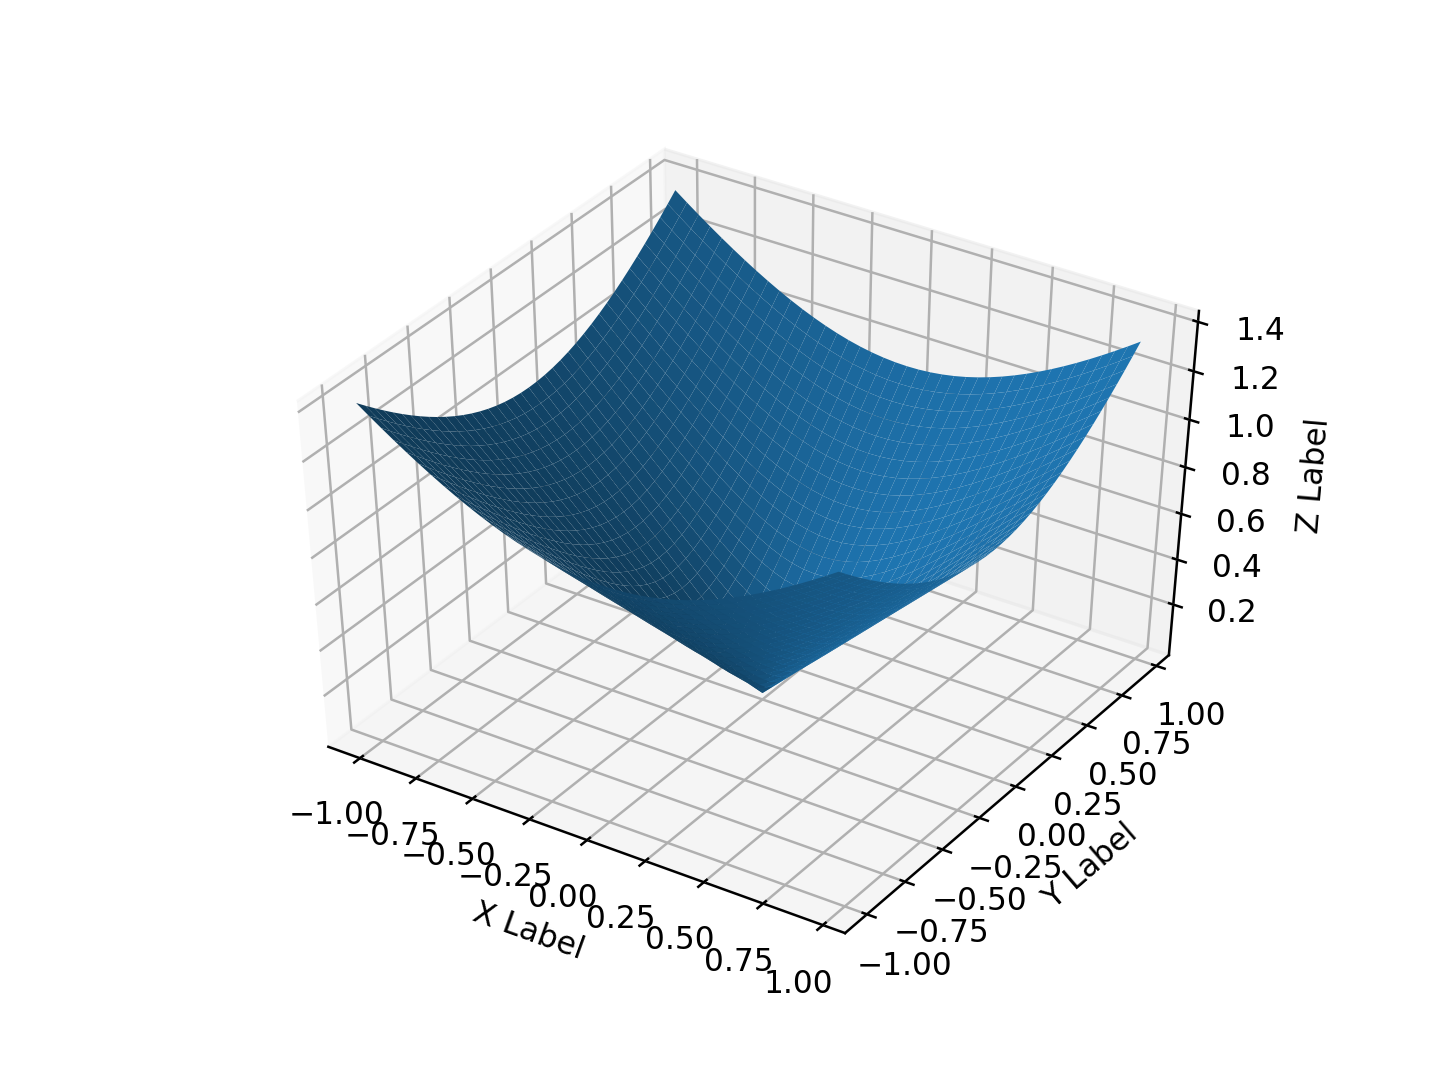

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

Now, we need to create some data.

In [17]:
# Create a lot of points from -1 to 1 with a step of 0.05
X = np.arange(-1.0, 1.0, 0.05)
Y = np.arange(-1.0, 1.0, 0.05)
# This will take X and Y and return coordinate matrices for the surface plot to work with
X, Y = np.meshgrid(X, Y)
# For Z, Take the square root of (X^2 + Y^2)
Z = np.sqrt(X**2 + Y**2)

Let's plot and show the figure,

In [18]:
# Plot it with this function
ax2.plot_surface(X, Y, Z)
# Add some labels
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

Text(0.5,0,'Z Label')

# Done
Your good to go onto the challenges assuming you have no questions.